# Plot zarr archive

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import anemoi.datasets as ad
import cartopy.crs as ccrs
import matplotlib as mpl

In [3]:
zda = ad.open_dataset('./make-datasets/data/norkyst_v3_2024_01_01.zarr')

In [39]:
#data_dir = "/lustre/storeB/project/fou/hi/oper/norkyst_v3/forecast/his_zdepths/2024/01/01" #param=['temperature', 'salinity', 'u_eastward', 'v_northward']
#nda = ad.open_dataset(data_dir + '/norkyst800_his_zdepth_20240101T00Z_m00_AN.nc')

In [40]:
zda.shape

(24, 16, 1, 3153556)

In [41]:
zda.variables

['temperature_1',
 'temperature_10',
 'temperature_100',
 'temperature_1000',
 'temperature_15',
 'temperature_150',
 'temperature_200',
 'temperature_2000',
 'temperature_25',
 'temperature_250',
 'temperature_3',
 'temperature_300',
 'temperature_3000',
 'temperature_50',
 'temperature_500',
 'temperature_75']

In [42]:
# Data shap'en
# (24, 16, 1, 3153556) 
# tilsvarer i dette tilfellet: 24 tidssteg, 16 variables, 1 ensemble, ~3M gridpoints
zda.shape # samme som zda.data.shape

(24, 16, 1, 3153556)

In [43]:
# Print the methods of the dataset
dir(zda)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check',
 '_dates_to_indices',
 '_drop_to_columns',
 '_frequency_to_indices',
 '_len',
 '_reorder_to_columns',
 '_repr_html_',
 '_select_to_columns',
 '_shuffle_indices',
 '_subset',
 '_unwind',
 'arguments',
 'chunks',
 'data',
 'dataset_metadata',
 'dates',
 'dates_interval_to_indices',
 'dtype',
 'end_date',
 'end_of_statistics_date',
 'field_shape',
 'frequency',
 'from_name',
 'get_dataset_names',
 'grids',
 'label',
 'latitudes',
 'longitudes',
 'metadata',
 'metadata_specific',
 'missing',
 'mutate',
 'name_to_index',
 'path',
 'provenance',
 'resolution',
 'shape',
 'source',
 'start_d

In [79]:
zda.variables_metadata['temperature_1']

{'date': '20240101',
 'depth': 1,
 'step': 0,
 'time': '0000',
 'valid_datetime': '2024-01-01T00:00:00',
 'variable': 'temperature'}

In [45]:
# name_to_index will print all the variable names (16 of them) 
# and their indexes so we know how to access a variable by index
zda.name_to_index

{'temperature_1': 0,
 'temperature_10': 1,
 'temperature_100': 2,
 'temperature_1000': 3,
 'temperature_15': 4,
 'temperature_150': 5,
 'temperature_200': 6,
 'temperature_2000': 7,
 'temperature_25': 8,
 'temperature_250': 9,
 'temperature_3': 10,
 'temperature_300': 11,
 'temperature_3000': 12,
 'temperature_50': 13,
 'temperature_500': 14,
 'temperature_75': 15}

In [46]:
# Get surface temp at time 0 by index 
# (time index, temperature_0, : , :)
surface_temp = zda[0,0,:,:]

In [47]:
surface_temp.shape

(1, 3153556)

### Plotting zarr to see if data makes sense

In [48]:
# The data are defined in lat/lon coordinate system, so PlateCarree()
# is the appropriate choice:
data_crs = ccrs.PlateCarree()

proj = ccrs.LambertConformal(
        central_longitude=30, 
        central_latitude=67.9
        )

/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


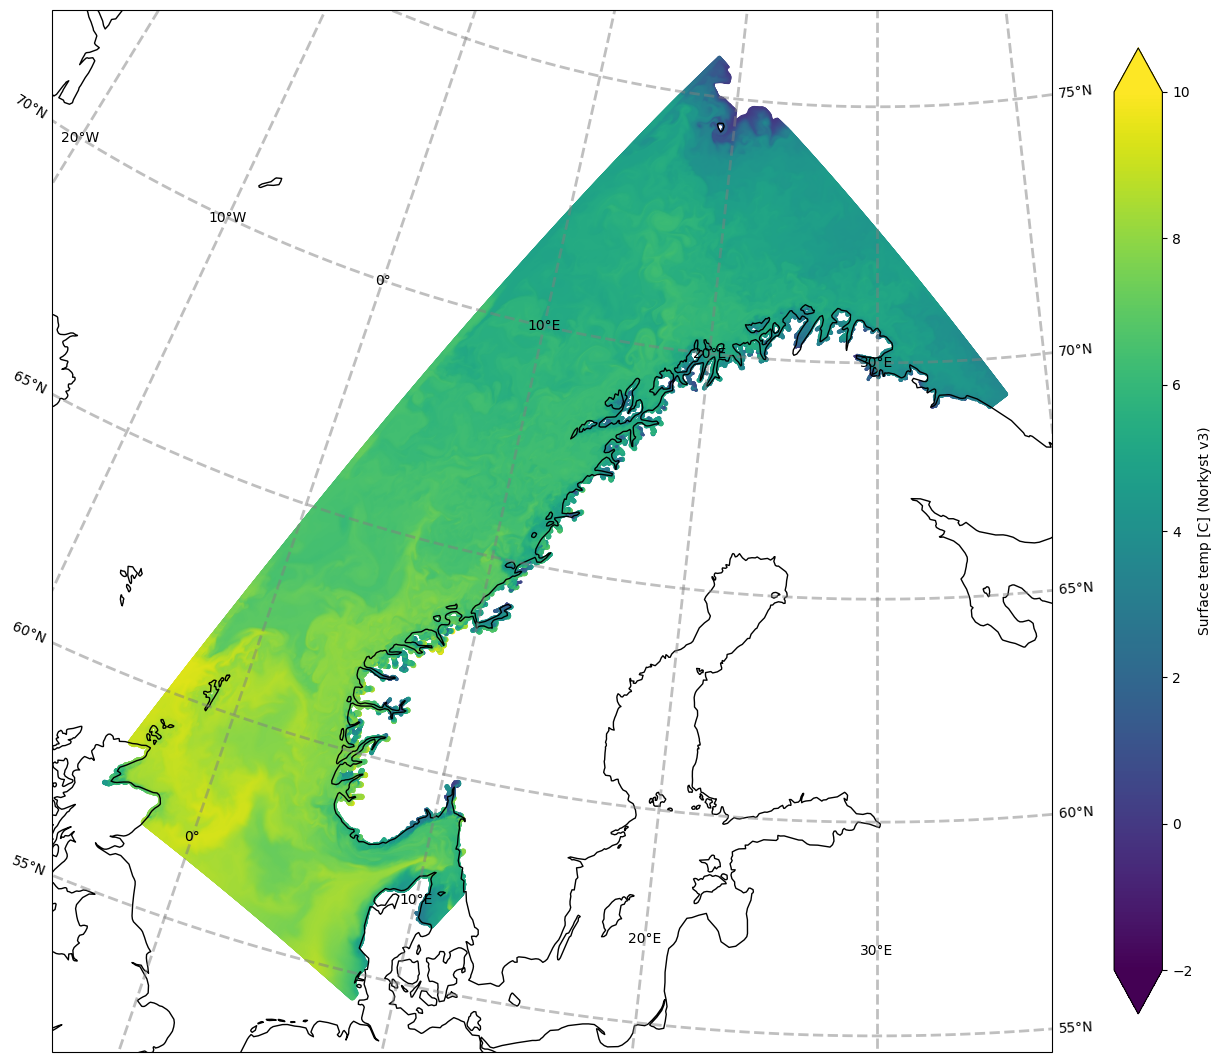

In [49]:

fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=proj)
ax.coastlines()

indx_stemp = zda.name_to_index['temperature_1']
stemp = zda[0][indx_stemp,0,:]
# ...but now using the transform argument
c = ax.scatter(zda.longitudes, zda.latitudes, stemp, c=stemp, transform=data_crs, edgecolor=None, vmax=10, vmin=-2)
#ax.set_extent(extent,
            #crs=ccrs.PlateCarree()
#            ) 
#ax.gridlines(ls = '--', draw_labels=True)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

mpl.pyplot.subplots_adjust(
    left=None, 
    bottom=None, 
    right=0.75, 
    top=0.8, 
    wspace=0.1, 
    hspace=0.3
    )

#cb = plt.colorbar(c, shrink=0.5)

cax,kw = mpl.colorbar.make_axes(
        ax,
        location='right', 
        pad=0.05, 
        shrink=0.7
        )
out=plt.colorbar(
        c, 
        cax=cax, 
        extend='both', 
        extendrect=False,
        label=('Surface temp [C] (Norkyst v3)'),
        **kw
        )

### Plot more layers? and anim maybe

In [6]:
import sys
sys.path.append("/lustre/storeB/project/fou/hi/foccus/aifs-mono-ocean/make-datasets/plot")
from plotting import plot_dataset

In [66]:
temp_3000 = zda[0,12,0,:]
temp_1000 = zda[0,3,0,:]
temp_1 = zda[0,0,0,:]

/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


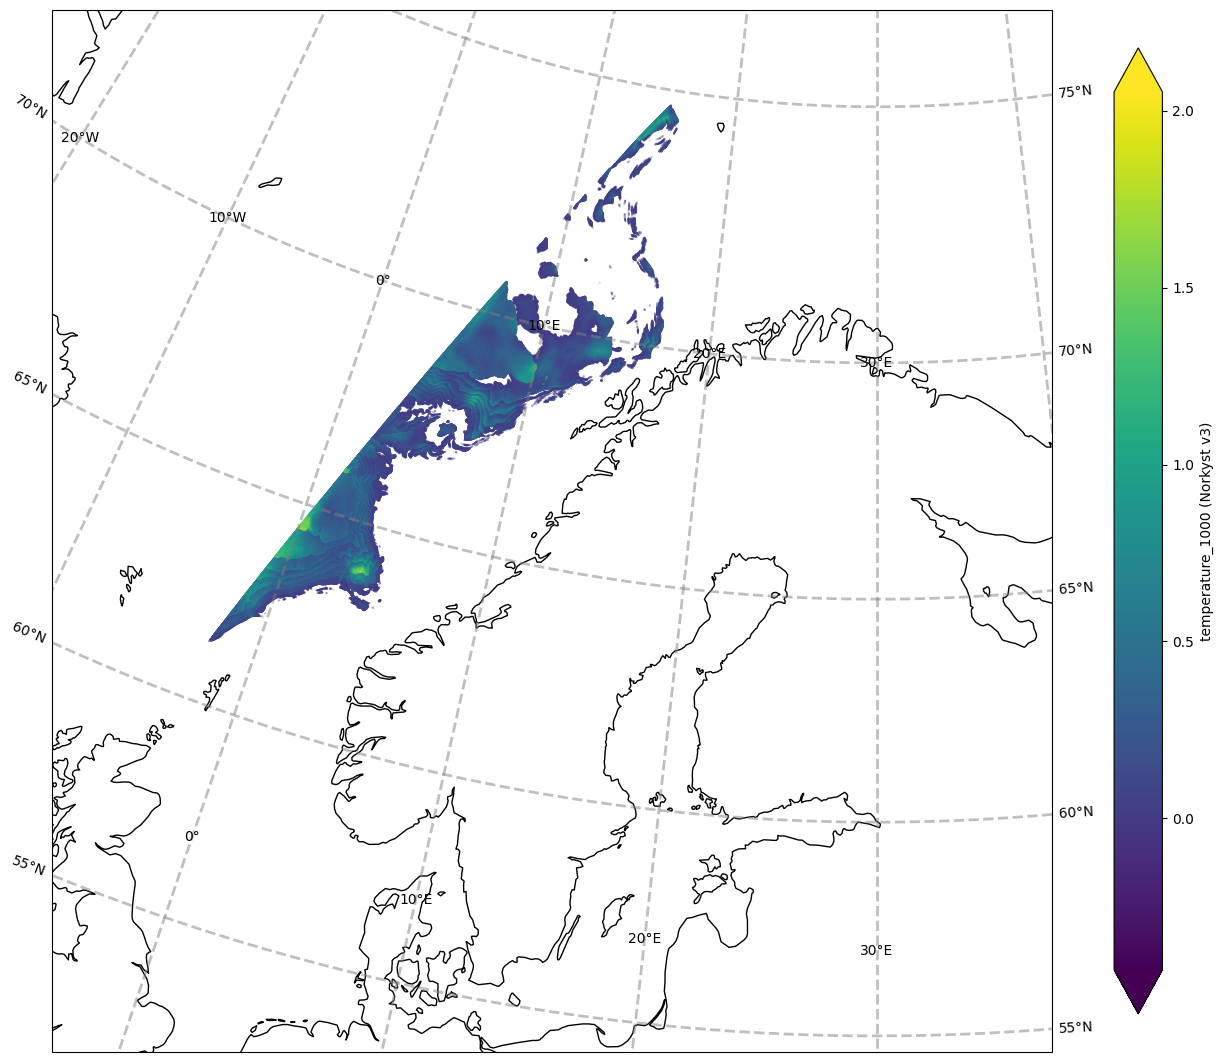

/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/lustre/storeB/project/fou/hi/foccus/python-envs/anemoi-env/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


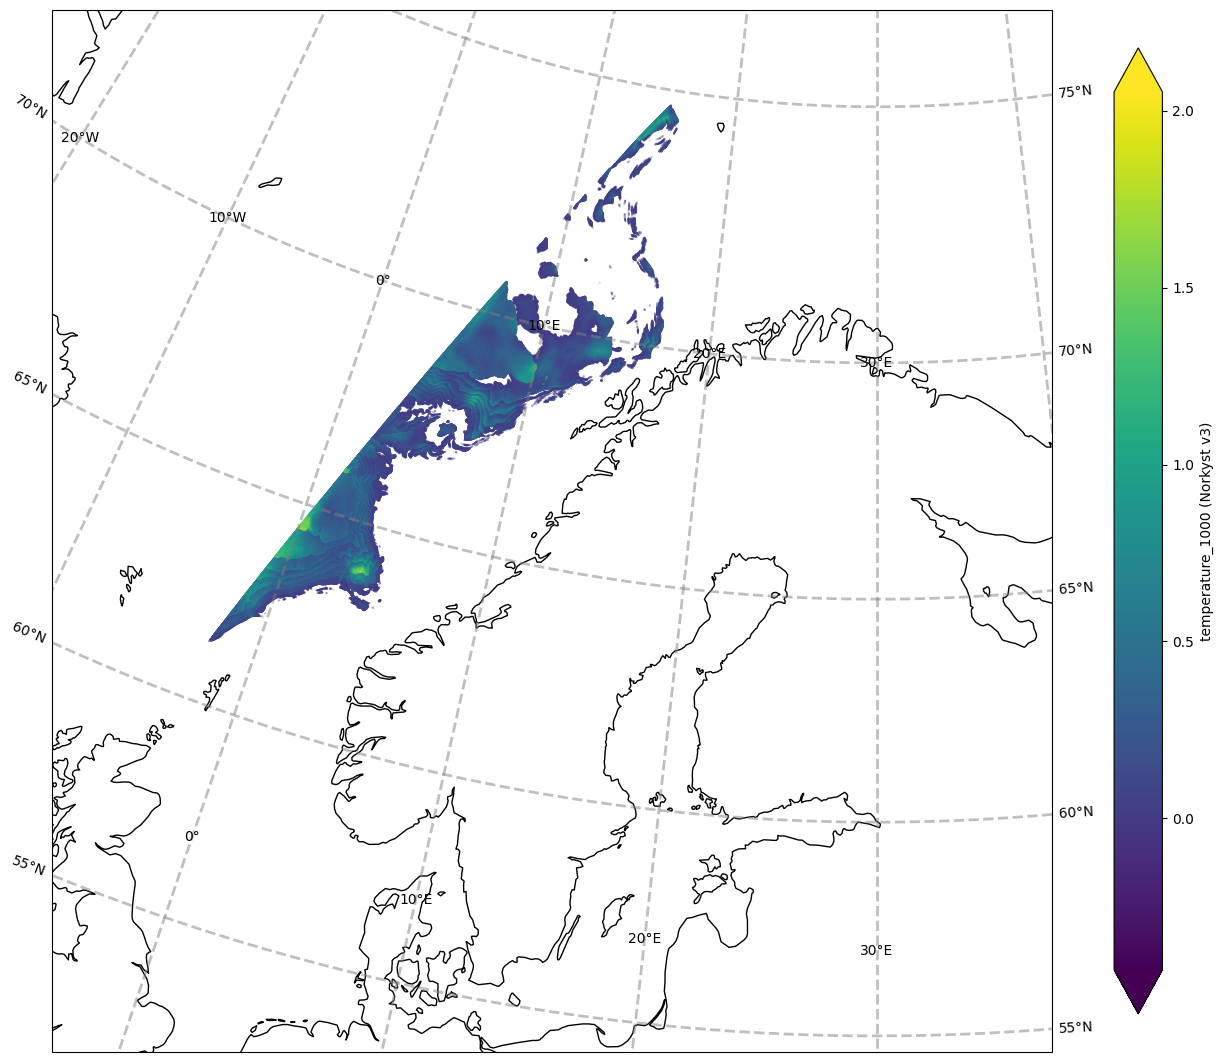

In [7]:

plot_dataset(zda, 'temperature_1000')